In [196]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import sklearn
import pandas
import matplotlib.pyplot as plt
%matplotlib inline  

In [197]:
dfRaw = pandas.read_csv('contactid_08_01_18download.csv', encoding="utf-8")

In [198]:
dfRaw

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
0,1003,a0000022d8b566-1485854260,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.0,1.0,17.0,1.0,4.0
1,1003,a0000022d8b566-4428755,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,21.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,NaN,NaN
3,1003,a0000022d8b5661085053215,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
4,1003,a0000022d8b5661306093745,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,1.0,1.0,NaN,NaN,5.0,1.0,1.0,2.0,3.0
5,1003,a0000022d8b5661374658182,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
6,1003,a0000022d8b5662119192337,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,302.0,1.0,128.0,1.0,1.0
7,1003,a0000022d8b5662120103081,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN
8,1003,a0000022d8b566439263804,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,1.0,3.0,1.0,1.0
9,1003,a0000022d8b566691081474,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,2.0,0.0,1.0,NaN,NaN,266.0,1.0,54.0,1.0,2.0


In [199]:
dfclean = dfRaw.loc[dfRaw['close'].notnull()]

In [200]:
dfclean

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,NaN,NaN
17,1004,a0000022aa5cd6-212065659,Phone survey,Person,Working Formally,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,NaN,NaN,2.0,0.0,0.0,NaN,NaN
24,1004,a0000022aa5cd61447330108,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
28,1004,a0000022aa5cd62103159229,Phone survey,Person,NaN,1.0,55.0,0.0,0.0,1.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,NaN
33,1004,a0000022aa5cd6846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,1.0,1.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,NaN,NaN
36,1004,a0000022d95d9b-1043125280,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,NaN,NaN
46,1004,a0000022d95d9b-879869607,Phone survey,Person,Self-employed,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,NaN,NaN,3.0,1.0,1.0,34.0,34.0
52,1004,a0000022d95d9b17610566,Phone survey,Person,Not Working,0.0,100.0,0.0,0.0,1.0,...,3.0,0.0,1.0,NaN,NaN,3.0,1.0,1.0,5.0,5.0
61,1004,a0000022d95d9b846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,0.0,1.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
67,1005,a0000022aa2754-765626467,Phone survey,Person,Working Formally,1.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,NaN,NaN


In [201]:
dfclean.shape[0]


2869

In [202]:
df_null_columns = dfclean.isnull().sum().to_frame('nulls')

In [203]:
df_null_columns

,nulls
Subject.Id,0
Contact.ID,0
cat,0
svy_contact,0
empstatus,266
jailprison,300
close,0
baseline_flag,0
dup,0
reinstall_flag1,0


In [204]:
df_null_columns.sum()

nulls    11689
dtype: int64

In [205]:
#Percentage of missing cells
df_null_columns.sum()/(dfclean.shape[0]*dfclean.shape[1])*100

nulls    11.317339
dtype: float64

In [206]:
df_null_rows = dfclean.isnull().sum(axis=1)

In [207]:
df_null_rows

2        4
17       4
24       0
28       3
33       2
36       2
46       2
52       2
61       0
67       2
68       2
76       0
87       0
88       0
99       4
101      2
103      2
106      4
107      0
113      0
114      0
116      2
119      2
120      0
121      4
123      4
125      2
126      0
127      0
128      0
        ..
18014    7
18015    7
18017    5
18038    7
18045    5
18058    7
18059    9
18062    9
18063    5
18071    7
18078    7
18095    5
18106    5
18135    9
18136    5
18144    6
18145    5
18169    9
18171    5
18174    8
18177    7
18190    7
18198    5
18205    9
18209    5
18220    8
18233    9
18237    5
18252    5
18254    5
Length: 2869, dtype: int64

In [208]:
(df_null_rows==0).sum()

608

In [209]:
#number of rows missing at least one cell
df_null_rows.shape[0]-((df_null_rows==0).sum())

#Therefore percentage of rows missing at least one cell equals
(df_null_rows.shape[0]-((df_null_rows==0).sum())) / (df_null_rows.shape[0]) * 100

78.80794701986756

In [210]:
#had some trouble importing fancyimpute 

#from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute

#dfcleanX = dfclean.simpleFill()

In [211]:
dfcleanX = dfclean.fillna(-1)

In [212]:
dfcleanX

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,4.0,0.0,0.0,-1.0,-1.0
17,1004,a0000022aa5cd6-212065659,Phone survey,Person,Working Formally,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,2.0,0.0,0.0,-1.0,-1.0
24,1004,a0000022aa5cd61447330108,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
28,1004,a0000022aa5cd62103159229,Phone survey,Person,-1,1.0,55.0,0.0,0.0,1.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,-1.0,-1.0
33,1004,a0000022aa5cd6846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,1.0,1.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,-1.0,-1.0
36,1004,a0000022d95d9b-1043125280,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,-1.0,-1.0
46,1004,a0000022d95d9b-879869607,Phone survey,Person,Self-employed,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,3.0,1.0,1.0,34.0,34.0
52,1004,a0000022d95d9b17610566,Phone survey,Person,Not Working,0.0,100.0,0.0,0.0,1.0,...,3.0,0.0,1.0,-1.0,-1.0,3.0,1.0,1.0,5.0,5.0
61,1004,a0000022d95d9b846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,0.0,1.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
67,1005,a0000022aa2754-765626467,Phone survey,Person,Working Formally,1.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,-1.0,-1.0


In [213]:
xdata = dfcleanX[['Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values 

In [214]:
xdata

array([[ 5.000e+00,  8.500e+01,  3.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  2.500e+01,  0.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.610e+02,  2.000e+00, ...,  1.200e+01,  1.000e+00,
         4.000e+00],
       ...,
       [ 8.000e+00,  1.437e+03,  3.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 5.000e+00,  4.970e+02,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.431e+03,  4.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [215]:
# from sklearn.preprocessing import scale
# scale(xdata)

In [216]:
import random
random.seed = 0
indices = np.array(range(2869))
random.shuffle(indices)
num_train = int(len(indices)*0.8)
train_indices = indices[:num_train]
test_indices =indices[num_train+1:]
# x = (dfcleanX.shape[0]) * .8

In [217]:
xtrain = xdata[train_indices]

In [218]:
xtrain


array([[ 1.000e+00,  2.940e+02,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 2.000e+00,  8.000e+00,  2.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 2.000e+01,  1.857e+03,  6.000e+00, ...,  1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 2.000e+00,  6.300e+01,  2.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 8.500e+01,  9.163e+03,  3.900e+01, ...,  1.900e+01,  1.000e+00,
         1.000e+01],
       [ 7.000e+00,  4.670e+02,  0.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00]])

In [219]:
xtrain.shape


(2295, 23)

In [220]:
xtest = xdata[test_indices]

In [221]:
xtest

array([[ 8.000e+00,  2.000e+02,  5.000e+00, ...,  3.000e+00,  1.000e+01,
         1.000e+01],
       [ 1.110e+02,  6.489e+03,  2.200e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.700e+01,  5.274e+03,  6.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 1.000e+00,  0.000e+00,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  3.870e+02,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  1.000e+01,  0.000e+00, ...,  0.000e+00,  1.000e+01,
         1.000e+01]])

In [222]:
# ravel creates 1d array
y = dfclean[['close']].values.ravel()

In [223]:
ytrain = y[train_indices]
ytest = y[test_indices]

In [224]:
ytrain
ytrain.shape

(2295,)

In [225]:
ytest
ytest.shape

(573,)

In [226]:
def transform(ytrain):
    if ytrain < 20:
        return 0
    if ytrain < 40:
        return 1
    if ytrain < 60:
        return 2
    if ytrain < 80:
        return 3
    if ytrain < 100:
        return 4
    return 5


ytrainClassifier = [transform(i) for i in ytrain]
ytestClassifier = [transform(i) for i in ytest]

In [227]:
ytestClassifier

[0,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 0,
 3,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 3,
 1,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 2,
 2,
 3,
 5,
 5,
 0,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 5,
 5,
 4,
 5,
 5,
 0,
 5,
 4,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 5,
 4,
 1,
 1,
 5,
 5,
 5,
 5,
 0,
 3,
 1,
 0,
 3,
 3,
 5,
 5,
 5,
 1,
 5,
 3,
 5,
 0,
 0,
 0,
 4,
 5,
 5,
 5,
 0,
 3,
 5,
 5,
 0,
 5,
 5,
 4,
 0,
 5,
 0,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 0,
 1,
 5,
 1,
 5,
 4,
 4,
 5,
 4,
 1,
 5,
 5,
 0,
 5,
 5,
 4,
 5,
 5,
 3,
 4,
 5,
 4,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 4,
 0,
 5,
 0,
 5,
 4,
 5,
 0,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 4,
 5,
 3,
 5,
 5,
 4,
 5,
 0,
 0,
 5,
 2,
 5,
 4,
 5,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 3,
 3,
 5,
 4,
 3,
 2,
 3,
 0,
 1,
 3,
 5,
 5,
 2,
 3,
 5,
 5,
 5,
 5,
 1,
 3,
 5,
 5,
 2,
 5,
 2,
 3,
 5,
 0,
 3,
 1,
 5,
 0,
 5,
 5,
 1,
 5,
 3,
 5,
 5,
 3,
 3,
 4,
 5,
 3,
 1,
 5,
 4,


In [228]:
xtrain.shape,ytrain.shape

((2295, 23), (2295,))

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier().fit(xtrain,ytrainClassifier)


In [230]:
yhatClassifier = classifier.predict(xtrain)

In [231]:
yhatClassifier

array([5, 0, 5, ..., 5, 5, 5])

In [232]:
yhatClassifier = classifier.predict(xtest)
accuracy_score(ytestClassifier, yhatClassifier)

0.4799301919720768

In [233]:
from sklearn import svm
regressor = svm.SVR()
regressor.fit(xtrain,ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [234]:
yhatRegressor = regressor.predict(xtrain)

In [235]:
yhatRegressor

array([96.99722854, 95.75602556, 99.2933978 , ..., 99.26648071,
       99.2933978 , 97.2933979 ])

In [236]:
mean_squared_error(ytrain, yhatRegressor)

1327.8812540429533

In [237]:
# is there a problem here?
yhatRegressor = regressor.predict(xtest)
mean_squared_error(ytest, yhatRegressor)

1325.6690433066806

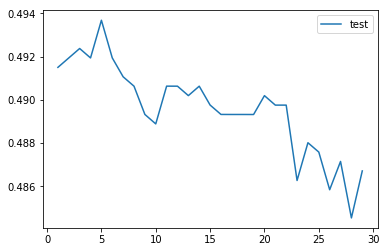

In [238]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

n_estimators = []
errors = []

for n_estimator in range(1,30):#[1,2,3,4,5,10,20,50]:
    ABCclf = GradientBoostingClassifier(n_estimators=n_estimator)
    scores = cross_val_score(ABCclf, xtrain, ytrainClassifier)
    error = scores.mean()
    n_estimators.append(n_estimator)
    errors.append(error)

plt.plot(n_estimators, errors, label="test")
plt.legend()

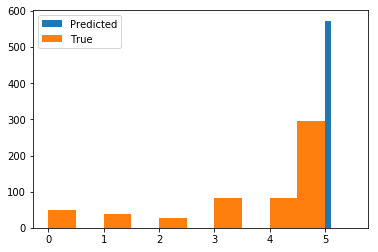

In [239]:
clf = AdaBoostClassifier(n_estimators=1).fit(xtrain,ytrainClassifier)
plt.hist(clf.predict(xtest), label="Predicted")
plt.hist(ytestClassifier, label="True")
plt.legend()

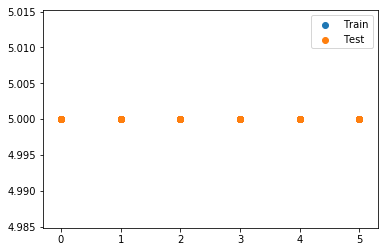

In [240]:
plt.scatter(ytrainClassifier, clf.predict(xtrain), label="Train")
plt.scatter(ytestClassifier, clf.predict(xtest), label="Test")
plt.legend()

In [241]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble.partial_dependence import plot_partial_dependence

# GBCclf = GradientBoostingClassifier(n_estimators=20).fit(xtrain,ytrainClassifier)
# features = [0, 1, (0, 1)]
# fig, axs = plot_partial_dependence(GBCclf, xtrain, features, label=0) 

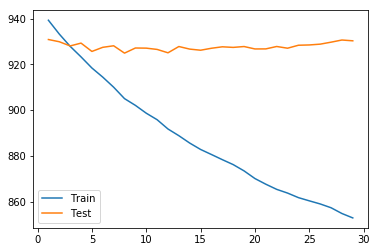

In [242]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,30): #[1,2,3,4,5,10,20,50]:
    regressor = GradientBoostingRegressor(n_estimators=n_estimator).fit(xtrain,ytrain)
    yhatRegressor = regressor.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(mean_squared_error(ytrain, yhatRegressor))
    test_err.append(mean_squared_error(ytest, regressor.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

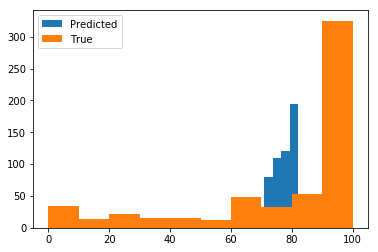

In [243]:
regressor = GradientBoostingRegressor(n_estimators=15).fit(xtrain,ytrain)
plt.hist(regressor.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

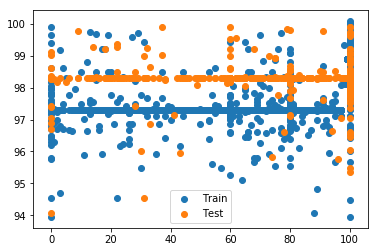

In [255]:
plt.scatter(ytrain, regressor.predict(xtrain), label="Train")
plt.scatter(ytest, regressor.predict(xtest), label="Test")
plt.legend()

In [267]:
#Fill Raw datafile with -1's
dfRawFilled = dfRaw.fillna(-1)

#only consider columns we are interested in
dfRawFilled = dfRawFilled[['Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values 

In [268]:
dfRawFilled.shape

(18265, 23)

In [269]:
#trying to put column in for predicted closeness

from sklearn import svm
regressor = svm.SVR()
regressor.fit(xtrain,ytrain)

yhatRegressorPredictions = regressor.predict(dfRawFilled)

#dfRaw['Predicted Closeness'] = yhatRegressor

In [271]:
yhatRegressorPredictions.shape

(18265,)

In [277]:
#Make a new dfRawPredicted with additional column and write out to new file

In [278]:
#call on new dfRawPredicted dataframe and this will override existing test file

dfRaw = dfRaw.to_csv('contactid_08_01_18Predictions.csv', encoding="utf-8")